In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88
...,...,...,...,...,...,...,...,...,...
995,yes,M,2,1,1,9,18,108,64.12
996,no,M,1,2,2,2,19,109,75.47
997,yes,M,2,2,1,5,17,123,76.73
998,yes,F,1,3,3,8,17,104,69.07


(1000, 8)

array(0.682)

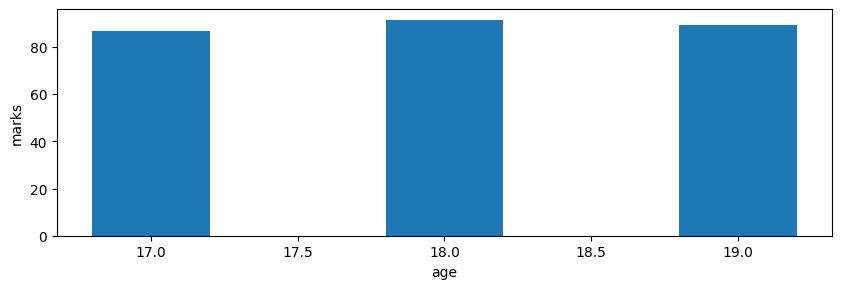

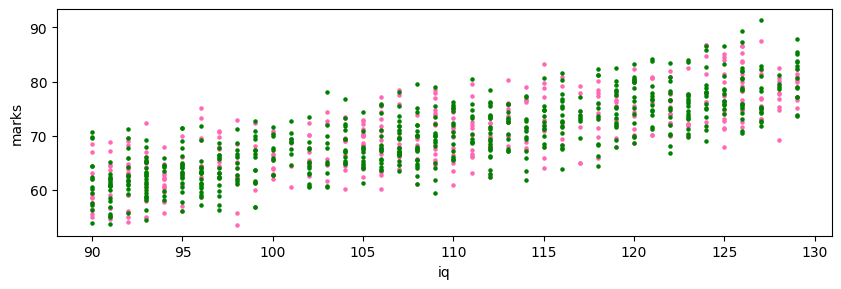

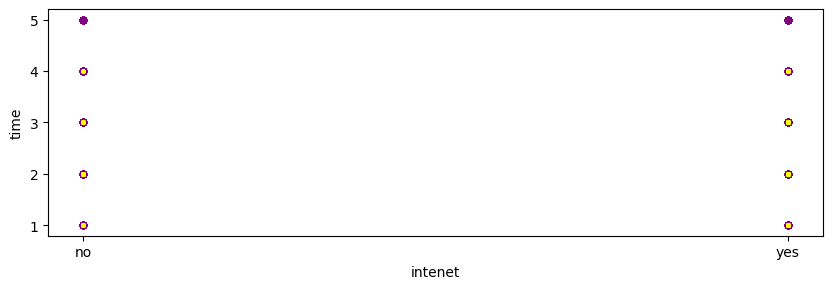

In [6]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)


# Try plotting y_train with different features

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.bar(data["age"],data["marks"],width=0.4)
plt.xlabel("age")
plt.ylabel("marks")

plt.figure(figsize=(10,10))
plt.subplot(3,1,2)
plt.scatter(data.where(data["sex"]=="F")["iq"],data["marks"],color="hotpink",s=5)
plt.scatter(data.where(data["sex"]=="M")["iq"],data["marks"],color="green",s=5)
plt.xlabel("iq")
plt.ylabel("marks")
# To get an idea whether to add some features or not
plt.figure(figsize=(10,10))
plt.subplot(3,1,3)
plt.scatter(data["internet"],data["freetime"],color="purple",s=20)
plt.scatter(data["internet"],data["studytime"],color="yellow",s=5)
plt.xlabel("intenet")
plt.ylabel("time")

# Add some features if required in x_train


# Also do label encoding for features not represented in numbers
for i in range(0,1000):
   if x_train[i,0] == "yes":
      x_train[i,0]=1
   else:
       x_train[i,0]=0

   if x_train[i,1] == "M":
      x_train[i,1]=1
   else:
       x_train[i,1]=0
display(data)
display(x_train.shape)

display(np.array((x_train[:,0].mean())))
def feature_changing(x_train):
 
 for i in range(0,x_train.shape[0]):
   if x_train[i,0] == "yes":
      x_train[i,0]=1
   elif x_train[i,0] == "no":
       x_train[i,0]=0

   if x_train[i,1] == "M":
      x_train[i,1]=1
   elif x_train[i,1] == "F":
       x_train[i,1]=0
 return x_train
      

x_train = feature_changing(x_train)

In [7]:
def z_score(x_train):
    x_mean=np.zeros(0)
    x_std=np.zeros(0)
    for i in range(0,8):
        x_mean=np.append(np.array(x_train[:,i].mean()),x_mean)
        x_std=np.append(np.array(x_train[:,i].std()),x_std)
    x_mean=np.flip(x_mean)
    x_std=np.flip(x_std)
    x_train = (x_train - x_mean)/x_std
    return x_train,x_std,x_mean

In [8]:
def cost(x_train,y_train,w,b):
   loss=0.0
   for i in range(0,1000):
     loss =loss+((((y_train[i])- (np.dot(x_train[i],w) + b))**2)/(2*x_train.shape[0]))
     
   #display(loss)
   return loss

In [9]:
def derivative(x_train,y_train,w,b):
    dj_dw=np.zeros(8)
    dj_dw=dj_dw.reshape(8,1)
   
    for j in range(0,8):
        dj_db=0
        for i in range(0,1000):
            dj_dw[j]=dj_dw[j]+(((np.dot(x_train[i],w)+b-y_train[i])*x_train[i][j])/1000.0)
            dj_db=dj_db+((np.dot(x_train[i],w)+b)-y_train[i])/1000.0
    #display(dj_dw)
    #display(dj_db)
    return dj_dw,dj_db

def gradient_descent(x_train,y_train,w,b):
    dj_dw,dj_db=derivative(x_train,y_train,w,b)
    w=w-0.01*dj_dw
    b=b-0.01*dj_db
    return w,b


In [10]:
x_train = x_train.astype(np.float64)



x_train,x_std,x_mean = z_score(x_train)

#display(x_mean)
np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1,1)
#display(w.shape)
#display(b)
old_cost = 0

while (abs(old_cost - cost(x_train,y_train,w,b))>0.00001):
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
display(b)
#display(x_predict)
display(w)
x_predict = feature_changing(x_predict)
#display(x_predict[:10,:])
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b


array([[69.92577671]])

array([[-1.39564892e+00],
       [-1.39236898e-03],
       [-8.98839410e-01],
       [ 3.45958792e+00],
       [-1.26802398e+00],
       [-1.47619789e+00],
       [ 1.63060861e-01],
       [ 5.34936757e+00]])

In [11]:

#display(y_predict)
#display(ans)
#display(len(ans))
accuracy = 0
for i  in range(len(ans)):
  if ((abs(y_predict[i]-ans[i]))<0.05) :# do not change the tolerance as you'll be checked on +- 0.5 error only
       accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy:.2f}%")

Congratulations, your accuracy is 100.00%
